In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression

# Generar datos simulados
np.random.seed(0)
X = np.random.rand(60, 1)  # Características
y = 2 * X + 1 + 0.1 * np.random.randn(60, 1)  # Objetivo con ruido


# Configurar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)


# Coeficientes del modelo
print("Coeficientes del modelo:")
print("Pendiente:", model.coef_)
print("Intercepción:", model.intercept_)

# Puntaje R^2 del modelo
print("Puntaje R^2 del modelo:", model.score(X, y))


Coeficientes del modelo:
Pendiente: [[1.92780665]]
Intercepción: [1.04094831]
Puntaje R^2 del modelo: 0.9683583235901999


### K-Fold Cross-Validation (Validación Cruzada con K Pliegues):
En K-Fold Cross-Validation, el conjunto de datos se divide en 'K' pliegues o particiones de aproximadamente igual tamaño. Luego, se realizan 'K' iteraciones, en cada una de las cuales un pliegue se utiliza como conjunto de prueba y los otros 'K-1' pliegues se utilizan como conjunto de entrenamiento. Esto permite evaluar el modelo en diferentes subconjuntos de datos, asegurando que cada muestra sea parte del conjunto de prueba exactamente una vez. Aquí está cómo funciona en detalle:

* Se divide el conjunto de datos en 'K' pliegues (en tu código, 'k' está configurado en 5).
* En cada iteración, un pliegue se selecciona como conjunto de prueba y los otros 'K-1' pliegues se utilizan como conjunto de entrenamiento.
* Se entrena el modelo de regresión lineal en el conjunto de entrenamiento.
* Se evalúa el modelo en el conjunto de prueba y se registra una métrica de rendimiento, en este caso, se calcula el error cuadrático medio (MSE).
* Se repiten estas iteraciones 'K' veces, cambiando el pliegue de prueba en cada iteración.
* Finalmente, se calcula el promedio de las métricas de rendimiento obtenidas en las 'K' iteraciones para obtener una estimación general del rendimiento del modelo.
El resultado es una estimación del rendimiento del modelo que es más robusta que simplemente dividir los datos en un conjunto de entrenamiento y un conjunto de prueba, ya que se evalúa en múltiples particiones diferentes de los datos.

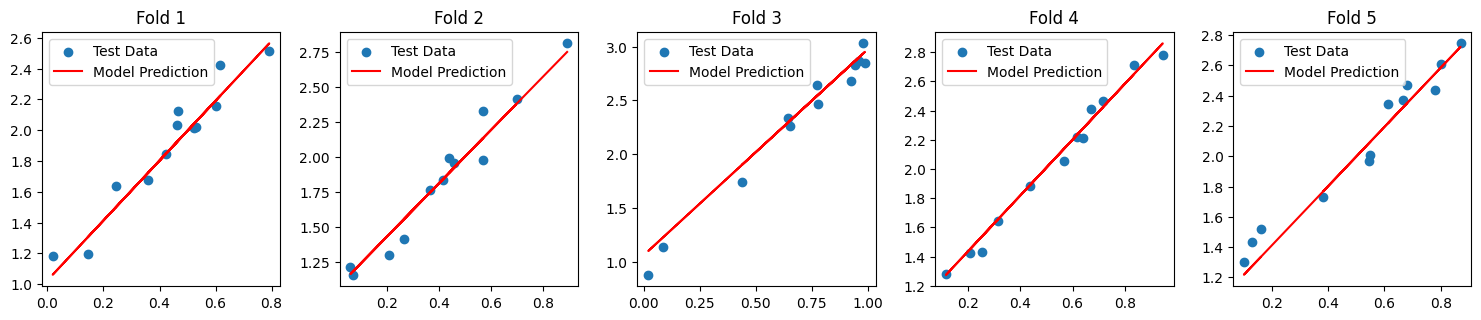

MSE promedio para K-Fold CV: 0.009859709109415003
[0.01193333541608505, 0.010384363426672991, 0.012330073387477896, 0.003493570399640163, 0.011157202917198919]


In [19]:

# Método 1: K-Fold Cross-Validation
k = 5  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(X_test, y_test, label='Test Data')
    plt.plot(X_test, y_pred, label='Model Prediction', color='red')
    plt.title(f'Fold {fold}')
    plt.legend()
    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print(mse_scores)

### Un MSE promedio para K-Fold Cross-Validation de 0.009735145858205585 se interpreta de la siguiente manera:

* Precisión del Modelo: Un MSE bajo es una señal positiva. En este caso, el MSE promedio de 0.0097 es relativamente bajo, lo que indica que tu modelo de regresión lineal tiende a hacer predicciones bastante precisas en los diferentes subconjuntos de datos creados por la validación cruzada.

* Ajuste del Modelo: Un MSE bajo sugiere que el modelo se ajusta bien a los datos. En otras palabras, el modelo es capaz de capturar y predecir la relación subyacente entre las características de entrada y la variable objetivo con precisión en promedio.

* Calidad del Modelo: En general, un MSE promedio de 0.0097 es bastante bueno. Deberías comparar este valor con un umbral de error aceptable para determinar si tu modelo cumple con los requisitos de precisión para el análisis específico que se está abordando.

* Comparación de Modelos: Si estás evaluando varios modelos o configuraciones de hiperparámetros, puedes utilizar el MSE promedio para compararlos. El modelo que tenga el MSE promedio más bajo generalmente se considera el mejor en términos de ajuste y precisión en el conjunto de datos utilizado el cross-validation.

* Consideración de la Variabilidad: Además del MSE promedio, es importante considerar la variabilidad en los resultados. Si el MSE varía significativamente entre los diferentes pliegues de K-Fold CV, puede ser una señal de que el modelo es sensible a la partición de los datos. Deberías examinar esta variabilidad para comprender la robustez del modelo.

### Leave-One-Out Cross-Validation (LOOCV):
LOOCV es una variante extrema de la validación cruzada en la que se utiliza una sola observación como conjunto de prueba y todas las demás como conjunto de entrenamiento en cada iteración. Esto significa que se realizan tantas iteraciones como instancias de datos tengas. LOOCV es útil cuando tienes un número limitado de datos y deseas maximizar el uso de ellos para la validación. Aquí está cómo funciona en detalle:

* En cada iteración, una sola instancia se selecciona como conjunto de prueba y todas las demás instancias se utilizan como conjunto de entrenamiento.
* Se entrena el modelo de regresión lineal en el conjunto de entrenamiento.
* Se evalúa el modelo en la instancia seleccionada como conjunto de prueba y se registra una métrica de rendimiento (en este caso, el MSE).
* Se repite este proceso para cada instancia de datos en tu conjunto de datos.
* Finalmente, se calcula el promedio de las métricas de rendimiento de todas las iteraciones.
LOOCV proporciona una estimación muy precisa del rendimiento del modelo, pero también puede ser costoso computacionalmente, ya que implica entrenar y evaluar el modelo tantas veces como instancias de datos tengas.

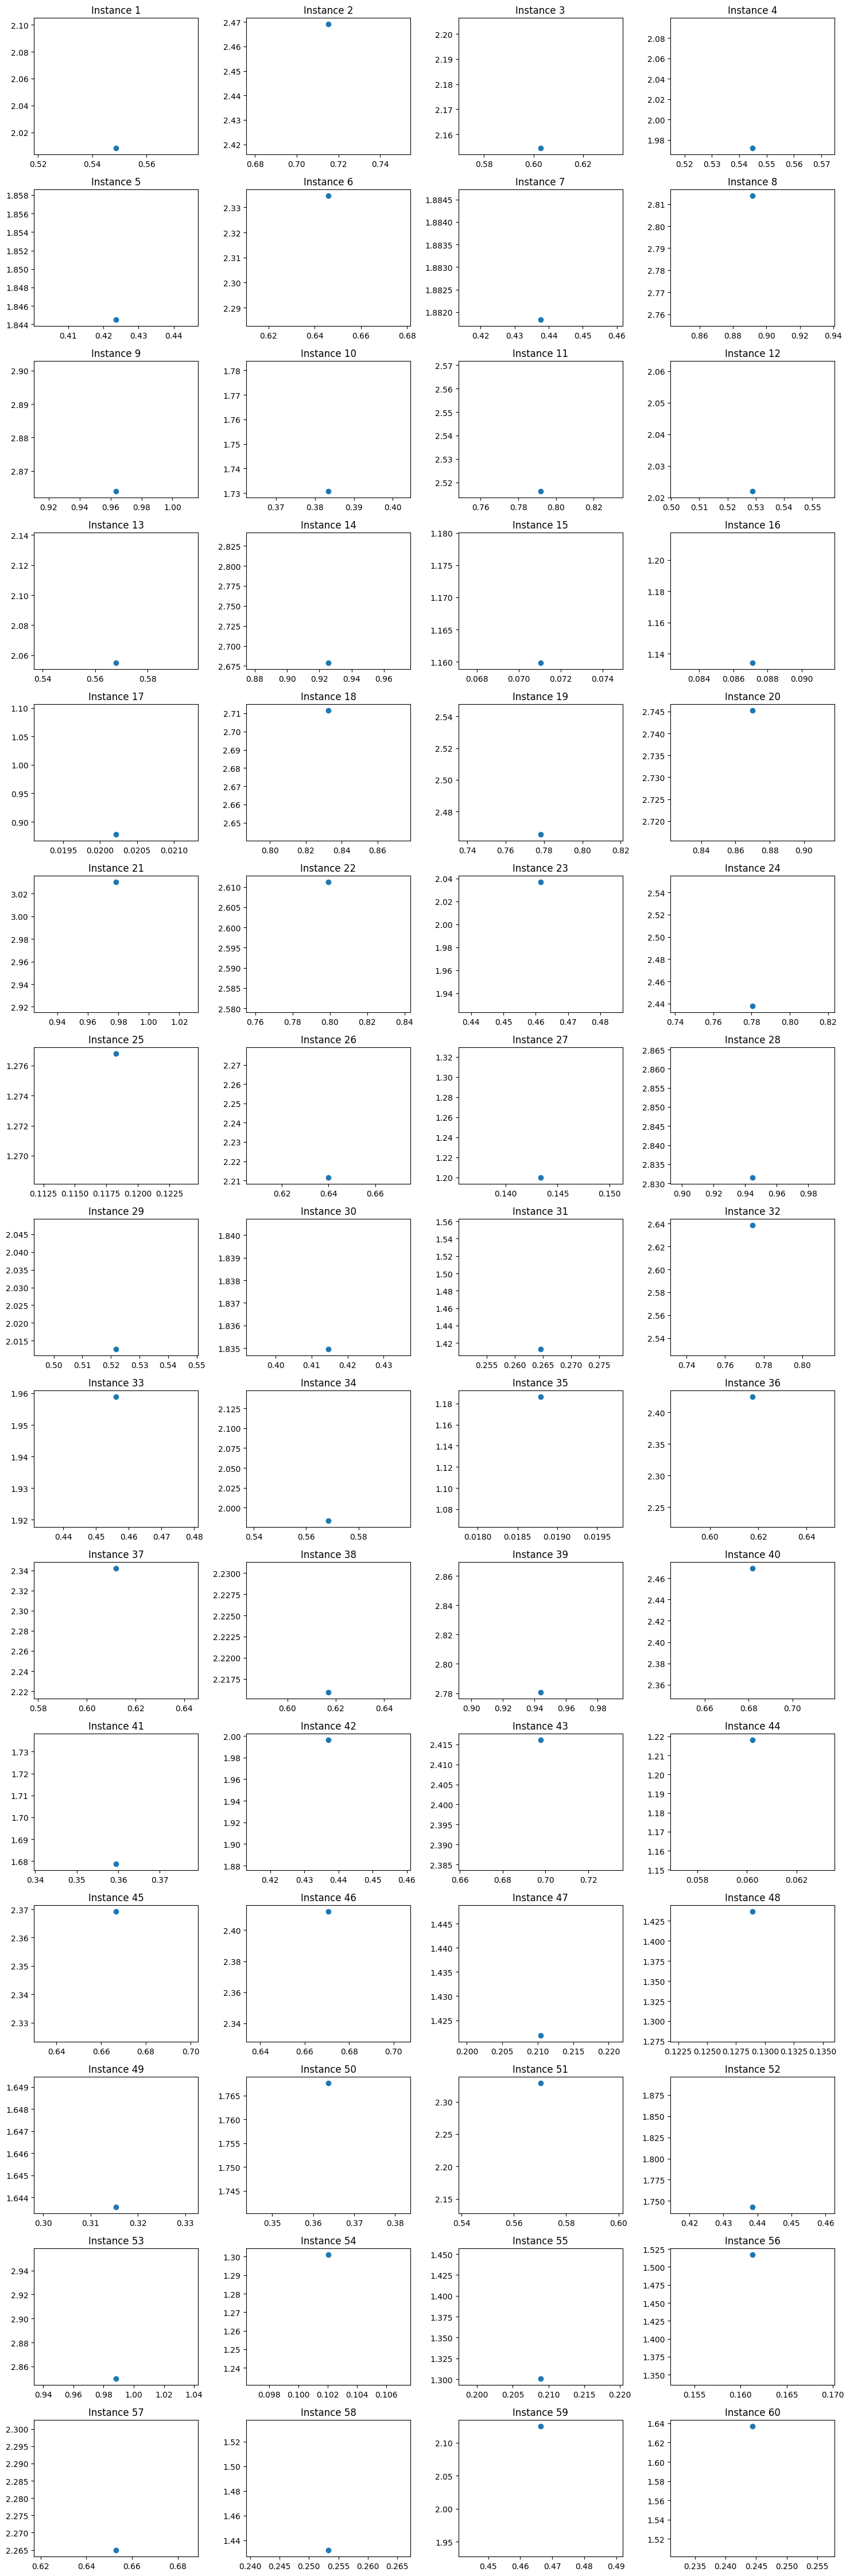

MSE promedio para LOOCV: 0.009818340845975411


In [33]:

# Método 2: Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
num_rows = X.shape[0]
num_cols = 4  # Visualizar las gráficas de tres en tres

# Calcular el número de filas y columnas para la visualización
num_rows_display = num_rows // num_cols + int(num_rows % num_cols > 0)

# Crear una figura para LOOCV
plt.figure(figsize=(15, 3 * num_rows_display))

fold = 1
mse_scores = []

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada instancia en LOOCV
    plt.subplot(num_rows_display, num_cols, fold)
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.title(f'Instance {fold}')
    fold += 1

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Calcular el MSE promedio para LOOCV
mean_mse_loocv = np.mean(mse_scores)

# Mostrar los resultados
plt.show()

print(f"MSE promedio para LOOCV: {mean_mse_loocv}")

### Aquí hay una interpretación de este resultado:

* MSE Promedio: El MSE es una medida de la calidad de tu modelo de regresión. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo. En este caso, un MSE promedio de 0.009294602144521118 es bastante bajo, lo que sugiere que tu modelo tiende a predecir los valores objetivo (en este caso, la variable que estás tratando de predecir) con precisión.

* Precisión del Modelo: Un bajo MSE promedio significa que, en promedio, las predicciones de tu modelo están muy cerca de los valores reales. Esto indica que el modelo de regresión lineal que has entrenado es bastante preciso en este conjunto de datos en particular.

* Ajuste del Modelo: Un MSE promedio bajo también puede indicar que el modelo se ajusta bien a los datos. En otras palabras, el modelo es capaz de capturar la relación subyacente entre las características de entrada y la variable objetivo de manera efectiva.

* Generalización: Aunque un bajo MSE promedio es una señal positiva, es importante recordar que LOOCV evalúa el rendimiento del modelo en los mismos datos utilizados para el entrenamiento. Esto significa que el modelo ha visto cada punto de datos exactamente una vez como conjunto de prueba. Siempre es crucial verificar el rendimiento del modelo en datos completamente nuevos o en un conjunto de prueba independiente para asegurarse de que pueda generalizar bien a datos no vistos.

* Comparación: Si estás evaluando varios modelos o configuraciones de hiperparámetros, puedes utilizar el MSE promedio como un criterio de comparación. El modelo con el MSE promedio más bajo en LOOCV generalmente se considera el mejor en términos de ajuste y precisión en el conjunto de datos de entrenamiento.

### Bootstrap
Bootstrap es una técnica de remuestreo ampliamente utilizada en estadísticas y aprendizaje automático para estimar distribuciones de estadísticas de población, como la media, la varianza, el sesgo, entre otros. Esta técnica es especialmente útil cuando tienes un conjunto de datos limitado y deseas obtener información sobre la variabilidad de una estadística o estimador sin recopilar más datos.


1. Proceso de Bootstrap:

El proceso de Bootstrap se puede resumir en los siguientes pasos:

Paso 1: Tienes una muestra original de datos con 'n' observaciones.

Paso 2: Generas una muestra bootstrap aleatoriamente tomando 'n' observaciones de la muestra original con reemplazo. Algunas observaciones pueden aparecer múltiples veces en la muestra bootstrap, mientras que otras pueden no aparecer en absoluto.

Paso 3: Calculas la estadística de interés (por ejemplo, la media) utilizando la muestra bootstrap generada en el paso 2.

Paso 4: Repites los pasos 2 y 3 un gran número de veces (por lo general, miles de veces) para crear múltiples muestras bootstrap y, por lo tanto, múltiples estimaciones de la estadística.

Paso 5: Analizas la distribución de las estimaciones bootstrap para obtener información sobre la variabilidad y la incertidumbre de la estadística de interés.

2. Ventajas de Bootstrap:

No requiere supuestos paramétricos: A diferencia de algunos métodos estadísticos que asumen una distribución específica para los datos, Bootstrap es no paramétrico y no requiere supuestos sobre la distribución de los datos.

Flexibilidad: Puede aplicarse a una amplia variedad de estadísticas y estimadores, lo que lo hace versátil y aplicable en diversas situaciones.

Incorpora la incertidumbre de la muestra: Bootstrap proporciona estimaciones de intervalo y varianza que reflejan la incertidumbre inherente a una muestra finita.

3. Uso de Bootstrap:

Bootstrap se utiliza para:

Estimar estadísticas de población y calcular intervalos de confianza para estas estimaciones.

Evaluar la variabilidad y la robustez de los modelos estadísticos y de aprendizaje automático.

Realizar pruebas de hipótesis no paramétricas.

Validar y calibrar modelos estadísticos.





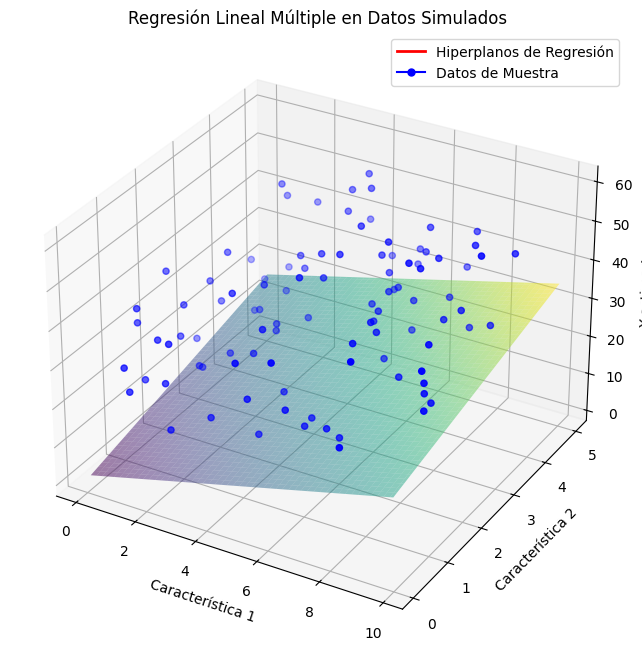

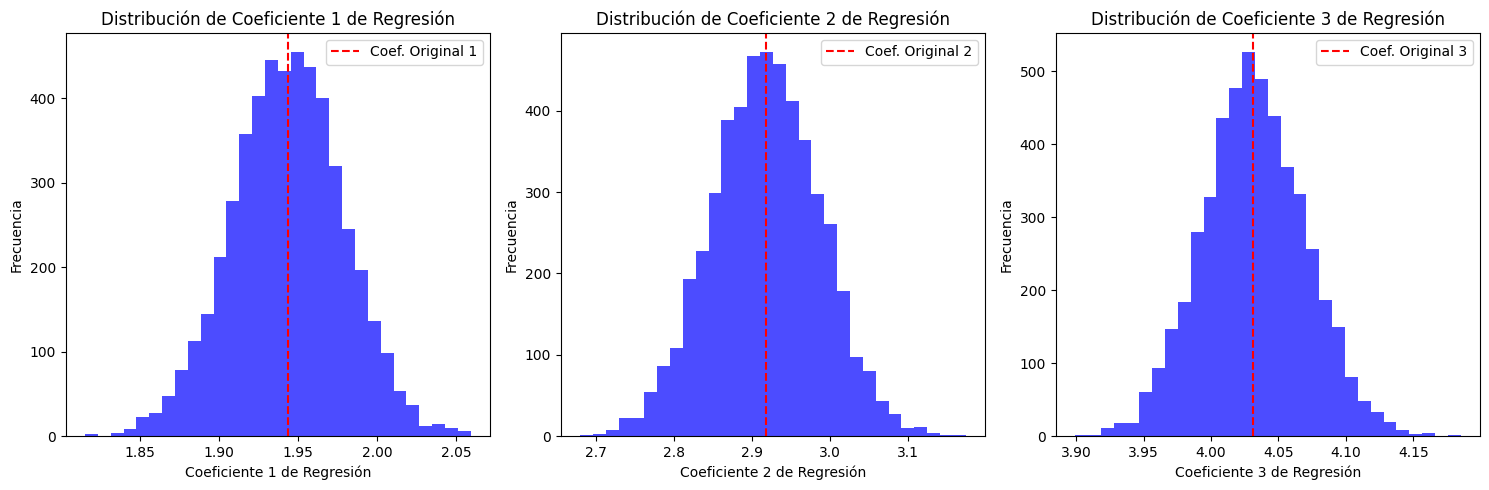

Resultados de los coeficientes Bootstrap:
Coeficiente 1: Media = 1.9435, Desviación Estándar = 0.0352
Coeficiente 2: Media = 2.9175, Desviación Estándar = 0.0691
Coeficiente 3: Media = 4.0320, Desviación Estándar = 0.0383


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression

# Generar datos simulados con tres características
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10  # Característica 1
X2 = np.random.rand(100, 1) * 5   # Característica 2
X3 = np.random.rand(100, 1) * 8   # Característica 3
y = 2 * X1 + 3 * X2 + 4 * X3 + 1 + np.random.randn(100, 1)  # Objetivo con ruido

# Crear un DataFrame de Pandas para los datos
data = pd.DataFrame({'X1': X1.ravel(), 'X2': X2.ravel(), 'X3': X3.ravel(), 'y': y.ravel()})

# Ajustar un modelo de regresión lineal múltiple a los datos originales
model = LinearRegression()
X_multiple = data[['X1', 'X2', 'X3']]  # Características
y = data['y']  # Objetivo
model.fit(X_multiple, y)
coef_originales = model.coef_
intercept_original = model.intercept_

# Visualizar los datos originales y los hiperplanos de regresión de cada característica en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['y'], c='blue', label='Datos de Muestra')

# Calcular los hiperplanos de regresión para cada característica
x1_grid = np.linspace(data['X1'].min(), data['X1'].max(), 100)
x2_grid = np.linspace(data['X2'].min(), data['X2'].max(), 100)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)

# Calcular los valores de Z (objetivo estimado) para la superficie de regresión
Z_grid = intercept_original + coef_originales[0] * X1_grid + coef_originales[1] * X2_grid

# Graficar los hiperplanos de regresión
ax.plot_surface(X1_grid, X2_grid, Z_grid, cmap='viridis', alpha=0.5)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Y estimado')
ax.set_title('Regresión Lineal Múltiple en Datos Simulados')

# Crear una leyenda manualmente
ax.legend(handles=[plt.Line2D([0], [0], color='red', lw=2, label='Hiperplanos de Regresión'),
                   plt.Line2D([0], [0], marker='o', color='blue', label='Datos de Muestra', markersize=5)],
          loc='best')

plt.show()

# Aplicar Bootstrap para estimar los coeficientes de regresión múltiple
num_bootstrap_samples = 5000  # Número de muestras Bootstrap 
bootstrap_coefs = []
bootstrap_intercept = []

for _ in range(num_bootstrap_samples):
    # Generar una muestra bootstrap
    bootstrap_data = data.sample(frac=1, replace=True)  # Mezclar y tomar muestras con reemplazo
    X_bootstrap = bootstrap_data[['X1', 'X2', 'X3']]
    y_bootstrap = bootstrap_data['y']

    # Ajustar un modelo de regresión lineal múltiple a la muestra bootstrap
    model.fit(X_bootstrap, y_bootstrap)
    bootstrap_coefs.append(model.coef_)
    bootstrap_intercept.append(model.intercept_)

# Visualizar las distribuciones de los coeficientes de regresión múltiple
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    plt.hist(bootstrap_coefs_i, bins=30, color='blue', alpha=0.7)
    plt.axvline(x=coef_originales[i], color='red', linestyle='--', label=f'Coef. Original {i + 1}')
    plt.xlabel(f'Coeficiente {i + 1} de Regresión')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de Coeficiente {i + 1} de Regresión')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados de los coeficientes Bootstrap
print("Resultados de los coeficientes Bootstrap:")
for i, coef_name in enumerate(['Coeficiente 1', 'Coeficiente 2', 'Coeficiente 3']):
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    mean_coef_bootstrap = np.mean(bootstrap_coefs_i)
    std_coef_bootstrap = np.std(bootstrap_coefs_i)
    print(f"{coef_name}: Media = {mean_coef_bootstrap:.4f}, Desviación Estándar = {std_coef_bootstrap:.4f}")




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Generar datos simulados con dos características
np.random.seed(0)
X = np.random.rand(60, 2)  # Características
y = 2 * X[:,0] + 3 * X[:,1] + 1 + 0.1 * np.random.randn(60)  # Objetivo con ruido

# Configurar el modelo de regresión lineal
model = LinearRegression()

# Método 1: K-Fold Cross-Validation
k = 5  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV con múltiples factores: {mean_mse}")
print(mse_scores)

MSE promedio para K-Fold CV con múltiples factores: 0.010346208285894897
[0.006122761263700157, 0.007447655087765976, 0.013659110704953266, 0.015156484118441912, 0.009345030254613173]
